# UoG-DA_Group28 Jupyter Notebook: Regression - Mulitple Linear Regression (MLR)

<hr>

## <u> Initial Setup </u>


Based on our classification evaluation, we have standrized on utilizing a common dataset of `cir_ncir_agg` with a `80:20` split. We will look to import this data and the further subset it into a nlos data frame `nlos_df` and `los_df` to perform Multiple Linear Regression to predict the `RANGE` based on the other attributes in the dataset

In [1]:
from utils import *

from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# load the Datasets
dataset = load_from_pickle("cir_ncir_agg.pkl", "./pickled_data_sets")

nlos_df = dataset[dataset['NLOS'] == 1].copy().reset_index(drop=True)
los_df = dataset[dataset['NLOS'] == 0].copy().reset_index(drop=True)

nlos_df

,NLOS,RANGE,STDEV_NOISE,CIR_PWR,MAX_NOISE,FRAME_LEN,FP_POWER,RX_POWER,TH_POWER,CIR_MEDIAN,CIR_MAX,CIR_KURTOSIS,CIR_FP
0,1.0,7.86,60.0,14699.0,894.0,27.0,-101.249715,-99.156284,2.093431,231.5,16809.0,58.677750,1212.0
1,1.0,3.48,76.0,8748.0,1127.0,39.0,-99.446556,-100.667900,-1.221345,256.0,15742.0,106.180924,2907.0
2,1.0,1.27,92.0,10256.0,1397.0,27.0,-91.963534,-98.346413,-6.382879,261.0,16839.0,102.355046,11193.0
3,1.0,4.99,100.0,9956.0,1485.0,27.0,-101.436625,-100.667900,0.768724,270.0,13797.0,50.283736,4829.0
4,1.0,9.09,72.0,15848.0,1073.0,27.0,-93.005210,-100.029423,-7.024214,244.5,16419.0,62.411476,11944.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,1.0,7.76,56.0,12753.0,848.0,39.0,-97.669923,-98.474785,-0.804862,220.0,20272.0,121.195085,1691.0
20996,1.0,4.12,80.0,3460.0,1198.0,39.0,-103.689861,-100.667900,3.021961,257.0,6787.0,47.012363,4306.0
20997,1.0,6.21,220.0,2145.0,3386.0,39.0,-105.777049,-100.667900,5.109148,639.5,7883.0,57.688939,2528.0
20998,1.0,5.48,72.0,1435.0,1092.0,39.0,-101.498684,-100.667900,0.830784,270.5,5908.0,99.529840,4445.0


## <u> NLOS </u>

In [2]:
# Select the features to be used for Classification
X = nlos_df.drop(columns = ['NLOS','RANGE'] )
Y = nlos_df[['RANGE']].to_numpy()
Y = Y.reshape(-1)

# Create the Training and Test set with split 80:20 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=RANDOM_STATE)

         Feature  Coefficient
6       TH_POWER     0.008753
7     CIR_MEDIAN     0.006785
0    STDEV_NOISE     0.002997
1        CIR_PWR     0.000061
10        CIR_FP     0.000003
8        CIR_MAX    -0.000083
2      MAX_NOISE    -0.001056
9   CIR_KURTOSIS    -0.009395
3      FRAME_LEN    -0.040547
5       RX_POWER    -0.056394
4       FP_POWER    -0.065147
Intercept: -5.086721787213556
Mean squared error (MSE): 4.00
Root Mean squared error (RMSE): 2.00
Coefficient of determination (R^2): 0.31


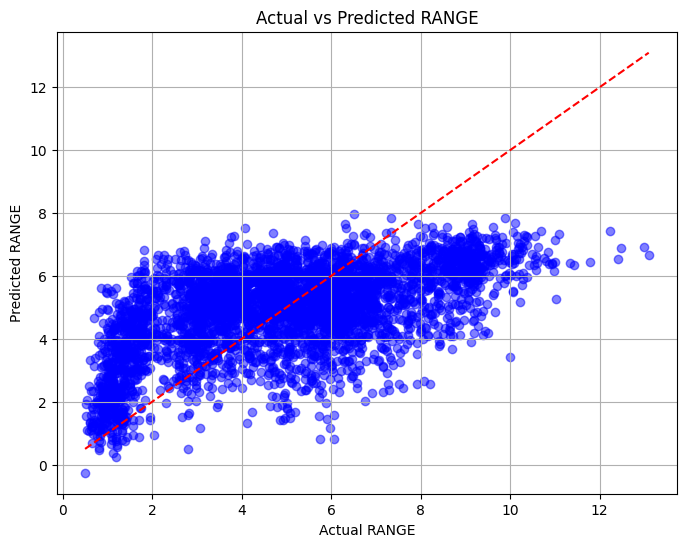

In [ ]:
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

coefficients_df = pd.DataFrame({
    'Feature': X.columns,  # Column names from X (your feature set)
    'Coefficient': model.coef_  # Coefficients from the trained model
}).sort_values(by=['Coefficient'], ascending=False)

mse_score = mean_squared_error(Y_test, Y_pred)
rmse_score = np.sqrt(mse_score)

print(coefficients_df)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f' % mse_score)
print('Root Mean squared error (RMSE): %.2f' % rmse_score)
print('Coefficient of determination (R^2): %.2f' % r2_score(Y_test, Y_pred))     

# Plot test vs predicted RANGE
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred, color='blue', alpha=0.5)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--')  # Line for perfect predictions
plt.title('Actual vs Predicted RANGE')
plt.xlabel('Actual RANGE')
plt.ylabel('Predicted RANGE')
plt.grid(True)
plt.show()

## <u> LOS </u>

In [4]:
# Select the features to be used for Classification
X = los_df.drop(columns = ['NLOS','RANGE'] )
Y = los_df[['RANGE']].to_numpy()
Y = Y.reshape(-1)

# Create the Training and Test set with split 80:20 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=RANDOM_STATE)

         Feature  Coefficient
0    STDEV_NOISE     0.052192
7     CIR_MEDIAN     0.008830
9   CIR_KURTOSIS     0.005212
3      FRAME_LEN     0.000126
10        CIR_FP     0.000015
8        CIR_MAX    -0.000026
1        CIR_PWR    -0.000101
2      MAX_NOISE    -0.002571
6       TH_POWER    -0.067639
4       FP_POWER    -0.109233
5       RX_POWER    -0.176872


Intercept: -25.409622442989978
Mean Absolute Error: 0.8413017602867147
Mean Squared Error: 1.1479068848371434
Root Mean Squared Error: 1.071404165026972
R² Score: 0.5834057805465654


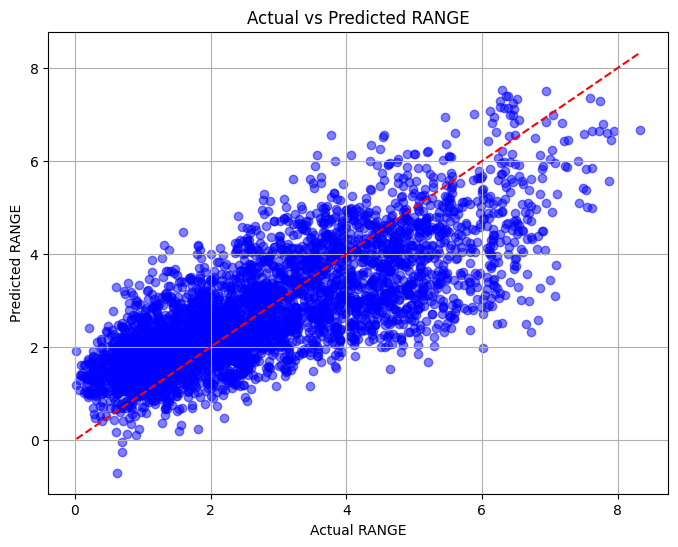

In [5]:
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

coefficients_df = pd.DataFrame({
    'Feature': X.columns,  # Column names from X (your feature set)
    'Coefficient': model.coef_  # Coefficients from the trained model
}).sort_values(by=['Coefficient'], ascending=False)

mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

print(coefficients_df)
print('Intercept:', model.intercept_)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R² Score: {r2}")

# Plot test vs predicted RANGE
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred, color='blue', alpha=0.5)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--')  # Line for perfect predictions
plt.title('Actual vs Predicted RANGE')
plt.xlabel('Actual RANGE')
plt.ylabel('Predicted RANGE')
plt.grid(True)
plt.show()